In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binned_statistic

In [2]:
erfs = pd.read_csv('../data_output/fair_ERFaer/ssp119.csv', index_col='year')
mean_erfs = erfs[2005.5:2014.5].mean(axis=0)

In [3]:
ecs_constraints = pd.read_csv('../data_output/ecs.csv', index_col=0)
erf_constraints = pd.read_csv('../data_output/aerosol_distributions.csv', index_col=0)

In [4]:
ssp_119_T = pd.read_csv('../data_output/fair_temperature/ssp119.csv', index_col='year')
ssp_126_T = pd.read_csv('../data_output/fair_temperature/ssp126.csv', index_col='year')

observations = pd.read_csv('../data_input/gsat/ar6_four_set_mean_gmst.csv', index_col='Year')

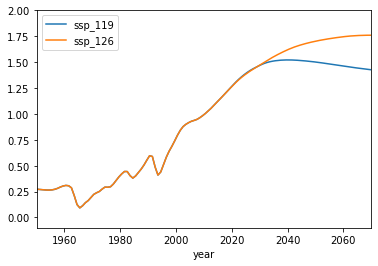

In [5]:
ssp_119_T.mean(axis=1).plot(xlim=[1950, 2070], ylim=[-0.1, 2.], label='ssp_119')
ssp_126_T.mean(axis=1).plot(xlim=[1950, 2070], ylim=[-0.1, 2.], label='ssp_126')
plt.legend()

In [6]:
ssp_119_erf = pd.read_csv('../data_output/fair_ERFaer/ssp119.csv', index_col='year')
ssp_126_erf = pd.read_csv('../data_output/fair_ERFaer/ssp126.csv', index_col='year')

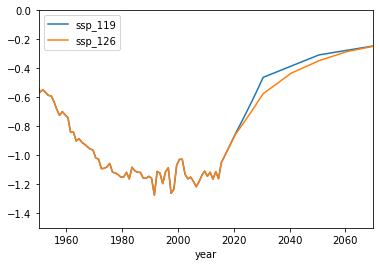

In [7]:
ssp_119_erf.mean(axis=1).plot(xlim=[1950, 2070], ylim=[-1.5, 0.], label='ssp_119')
ssp_126_erf.mean(axis=1).plot(xlim=[1950, 2070], ylim=[-1.5, 0.], label='ssp_126')
plt.legend()

<ipython-input-8-39be936ae1e2>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ssp_119_T[1980:].index, bins, temp_prob)


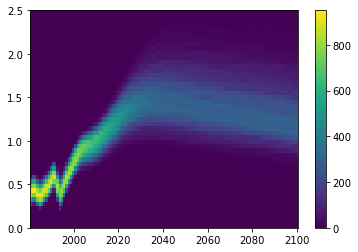

In [8]:
bins = np.linspace(0, 2.5, 50)
temp_prob = ssp_119_T.apply(lambda x: np.histogram(x, bins=bins, density=False)[0], axis=1, result_type='expand')[1980:].values.T
plt.pcolormesh(ssp_119_T[1980:].index, bins, temp_prob)
plt.colorbar()

<ipython-input-9-8fad4b67046e>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p=plt.pcolormesh(ssp_119_erf[1980:2050].index, bins,


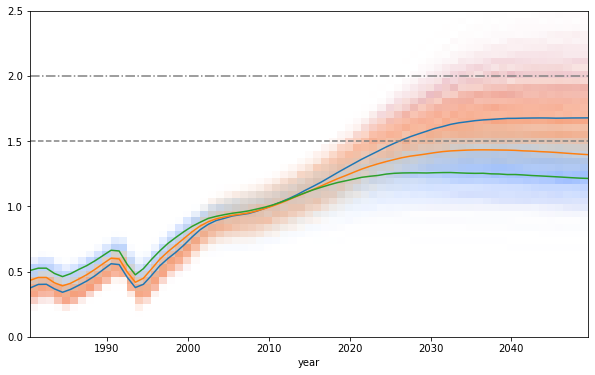

In [9]:
plt.figure(figsize=(10,6))
# p=plt.pcolormesh(ssp_119_erf.index[230:330], bins, np.stack(res)[230:330].T, cmap='RdBu', vmin=-1.5, vmax=-0.5)#, edgecolor='face', shading='auto')
p=plt.pcolormesh(ssp_119_erf[1980:2050].index, bins, 
                 ssp_119_T.apply(lambda x: binned_statistic(x, mean_erfs, bins=bins, statistic='mean')[0], axis=1, result_type='expand')[1980:2050].values.T,
                cmap='coolwarm_r', vmin=-1.6, vmax=-0.6)

plt.savefig('myfig.png') # or fig.canvas.draw()

def alpha_to_white(color, alpha):
    white = np.array([1,1,1])
#     alpha = color[-1]
    color = color[:-1]
    return alpha*color + (1 - alpha)*white

# normed_temp_prob = temp_prob/np.percentile(temp_prob, 99)
normed_temp_prob = (temp_prob/temp_prob.max(axis=0)) * 1.5

colors = p.get_facecolors()
colors = np.array([alpha_to_white(color, prob) for color, prob in zip(colors, normed_temp_prob[:, :69].flatten())])
# colors = np.array([np.append(color[:3], prob) for color, prob in zip(colors, normed_temp_prob[:, :120].flatten())])
p.set_facecolors(colors)


# plt.colorbar()
# print(colors.shape)
# print(temp_prob[:, :99].flatten().shape)
# for fc, j in zip(colors, normed_temp_prob[:, :99].flatten()):
# #     fc = alpha_to_white(fc, j) # Set the alpha value of the RGBA tuple using m2
#     fc[3] = j
# #     ec='k'

# def alpha_to_white(color):
#     white = np.array([1,1,1])
#     alpha = color[-1]
#     color = color[:-1]
#     return alpha*color + (1 - alpha)*white

# colors = np.array([alpha_to_white(color) for color in colors])
# p.set_facecolors(colors)

ssp_119_T.loc[1980:2050, erf_constraints.strong_aer.values].median(axis=1).plot()
ssp_119_T.loc[1980:2050, erf_constraints.mid_aer.values].median(axis=1).plot()
ssp_119_T.loc[1980:2050, erf_constraints.weak_aer.values].median(axis=1).plot()

plt.gca().axhline(1.5, ls='--', c='grey')
plt.gca().axhline(2, ls='-.', c='grey')

plt.show()



<ipython-input-10-0e115ddabcc7>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ssp_126_T[1980:].index, bins, temp_prob)


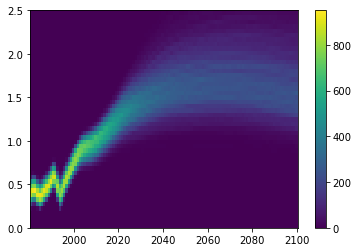

In [10]:
bins = np.linspace(0, 2.5, 50)
temp_prob = ssp_126_T.apply(lambda x: np.histogram(x, bins=bins, density=False)[0], axis=1, result_type='expand')[1980:].values.T
plt.pcolormesh(ssp_126_T[1980:].index, bins, temp_prob)
plt.colorbar()

<ipython-input-11-164249fc76d2>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p=plt.pcolormesh(ssp_126_T[1980:].index, bins,


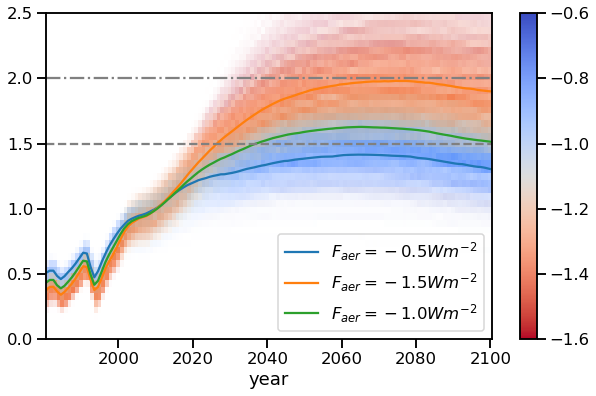

In [11]:
with sns.plotting_context('talk'):

    plt.figure(figsize=(10,6))
    # p=plt.pcolormesh(ssp_119_erf.index[230:330], bins, np.stack(res)[230:330].T, cmap='RdBu', vmin=-1.5, vmax=-0.5)#, edgecolor='face', shading='auto')
    p=plt.pcolormesh(ssp_126_T[1980:].index, bins, 
                     ssp_126_T.apply(lambda x: binned_statistic(x, mean_erfs, bins=bins, statistic='mean')[0], axis=1, result_type='expand')[1980:].values.T,
                    cmap='coolwarm_r', vmin=-1.6, vmax=-0.6)
    plt.colorbar()
    plt.savefig('myfig.png') # or fig.canvas.draw()

    def alpha_to_white(color, alpha):
        white = np.array([1,1,1])
    #     alpha = color[-1]
        color = color[:-1]
        return alpha*color + (1 - alpha)*white

    normed_temp_prob = (temp_prob/temp_prob.max(axis=0)) * 2

    colors = p.get_facecolors()
    colors = np.array([alpha_to_white(color, prob) for color, prob in zip(colors, normed_temp_prob[:, :120].flatten())])
    # colors = np.array([np.append(color[:3], prob) for color, prob in zip(colors, normed_temp_prob[:, :120].flatten())])
    p.set_facecolors(colors)


    ssp_126_T.loc[1980:, erf_constraints.weak_aer.values].median(axis=1).plot(label='$F_{aer}=-0.5Wm^{-2}$')
    ssp_126_T.loc[1980:, erf_constraints.strong_aer.values].median(axis=1).plot(label='$F_{aer}=-1.5Wm^{-2}$')
    ssp_126_T.loc[1980:, erf_constraints.mid_aer.values].median(axis=1).plot(label='$F_{aer}=-1.0Wm^{-2}$')

    
    plt.gca().axhline(1.5, ls='--', c='grey')
    plt.gca().axhline(2, ls='-.', c='grey')
    plt.legend()
    plt.show()




/Users/watson-parris/miniconda3/envs/xarray/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
<ipython-input-12-9f6f41dff8ee>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p=plt.pcolormesh(ssp_126_T[1980:].index, bins,


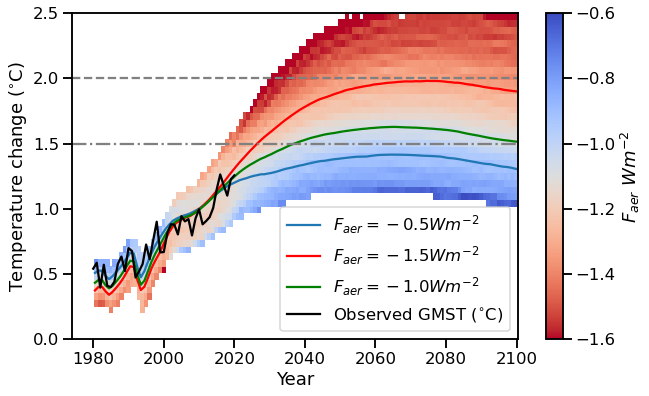

In [12]:
with sns.plotting_context('talk'):

    normed_temp_prob = (temp_prob/temp_prob.max(axis=0))
    
    def get_mean_erf(s):
        mean = binned_statistic(s, mean_erfs, bins=bins, statistic='mean')[0]
        count = np.histogram(s, bins=bins, density=True)[0]
        return np.where(count>0.1, mean, np.nan)
    
    plt.figure(figsize=(10,6))
    # p=plt.pcolormesh(ssp_119_erf.index[230:330], bins, np.stack(res)[230:330].T, cmap='RdBu', vmin=-1.5, vmax=-0.5)#, edgecolor='face', shading='auto')
    p=plt.pcolormesh(ssp_126_T[1980:].index, bins, 
                     ssp_126_T.apply(get_mean_erf, axis=1, result_type='expand')[1980:].values.T,
                    cmap='coolwarm_r', vmin=-1.6, vmax=-0.6)
    plt.colorbar(label='$F_{aer}$ $Wm^{-2}$')

    ssp_126_T.loc[1980:, erf_constraints.weak_aer.values].median(axis=1).plot(label='$F_{aer}=-0.5Wm^{-2}$')
    ssp_126_T.loc[1980:, erf_constraints.strong_aer.values].median(axis=1).plot(label='$F_{aer}=-1.5Wm^{-2}$', c='r')
    ssp_126_T.loc[1980:, erf_constraints.mid_aer.values].median(axis=1).plot(label='$F_{aer}=-1.0Wm^{-2}$', c='g')

    # Save these for the next plot...
    handles, labels = plt.gca().get_legend_handles_labels()
    
    observations.loc[1980:].rename(columns=dict(GMST='Observed GMST ($^{\circ}$C)')).plot(ax=plt.gca(), color='k')
    
    plt.gca().axhline(1.5, ls='-.', c='grey')
    plt.gca().axhline(2, ls='--', c='grey')
    plt.setp(plt.gca(), xlabel='Year', ylabel='Temperature change ($^{\circ}$C)')
    plt.legend()
    plt.savefig("Figure_1.png")
    plt.show()
    




In [13]:
joint_df = pd.DataFrame({'ERF':mean_erfs.values, 'ECS': ecs_constraints['ECS'].values, 'T':ssp_126_T[2045:2055].mean(axis=0).values})

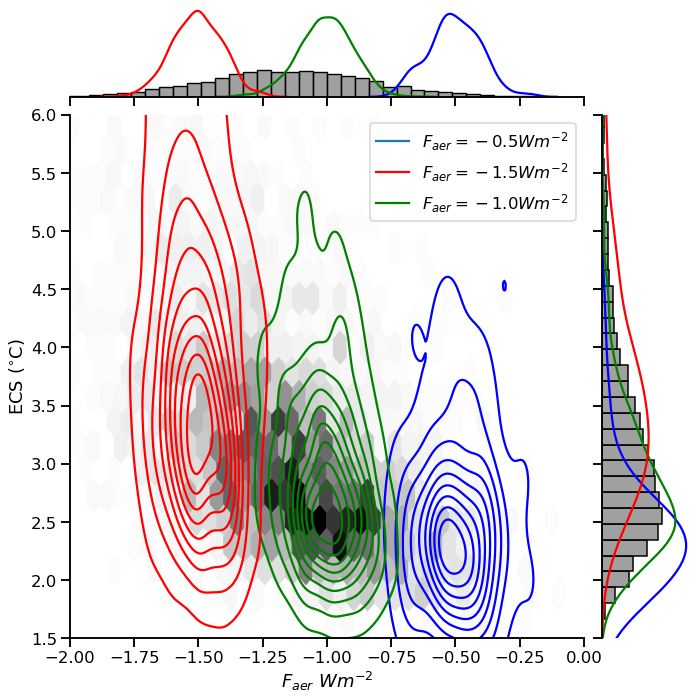

In [14]:
colors = {'weak': 'b', 'mid':'g', 'strong':'r'}

with sns.plotting_context("talk"):

    g = sns.jointplot(data=joint_df, x='ERF', y='ECS', kind='hex', marginal_kws=dict(stat='density', color='gray'), xlim=[-2, 0], ylim=[1.5, 6], height=10, cmap='Greys')

    sns.kdeplot(data=joint_df[erf_constraints.weak_aer.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['weak'], label='Weak')
    sns.kdeplot(data=joint_df[erf_constraints.weak_aer.values], x='ERF', ax=g.ax_marg_x, color=colors['weak'])
    sns.kdeplot(data=joint_df[erf_constraints.weak_aer.values], y='ECS', ax=g.ax_marg_y, color=colors['weak'])

    sns.kdeplot(data=joint_df[erf_constraints.mid_aer.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['mid'])
    sns.kdeplot(data=joint_df[erf_constraints.mid_aer.values], x='ERF', ax=g.ax_marg_x, color=colors['mid'])
    sns.kdeplot(data=joint_df[erf_constraints.mid_aer.values], y='ECS', ax=g.ax_marg_y, color=colors['mid'])

    sns.kdeplot(data=joint_df[erf_constraints.strong_aer.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['strong'])
    sns.kdeplot(data=joint_df[erf_constraints.strong_aer.values], x='ERF', ax=g.ax_marg_x, color=colors['strong'])
    sns.kdeplot(data=joint_df[erf_constraints.strong_aer.values], y='ECS', ax=g.ax_marg_y, color=colors['strong'])

    plt.setp(g.ax_joint, xlabel='$F_{aer}$ $Wm^{-2}$', ylabel='ECS ($^{\circ}$C)')
    g.ax_joint.legend(handles, labels)
    plt.savefig("Figure_2.png")
    plt.show()

    

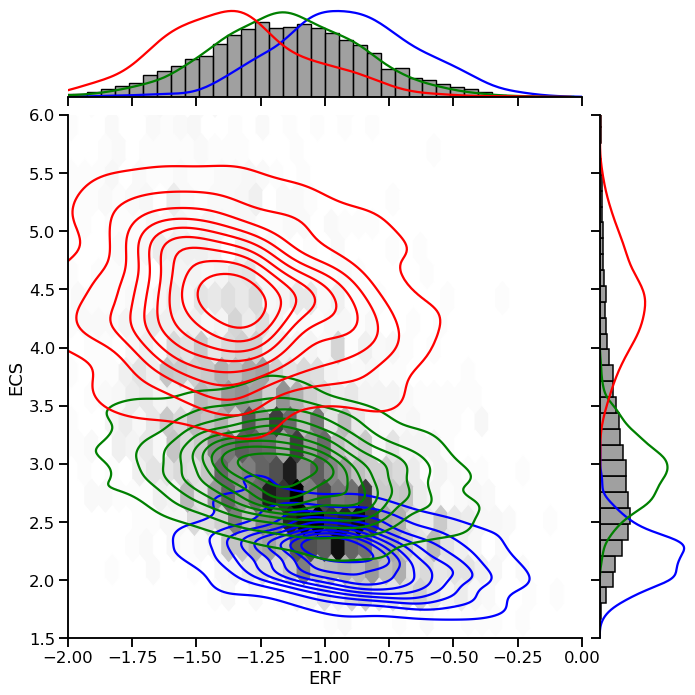

In [15]:
with sns.plotting_context("talk"):

    g = sns.jointplot(data=joint_df, x='ERF', y='ECS', kind='hex', marginal_kws=dict(stat='density', color='gray'), xlim=[-2, 0], ylim=[1.5, 6], height=10, cmap='Greys')

    sns.kdeplot(data=joint_df[ecs_constraints.low_ECS.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['weak'])
    sns.kdeplot(data=joint_df[ecs_constraints.low_ECS.values], x='ERF', ax=g.ax_marg_x, color=colors['weak'])
    sns.kdeplot(data=joint_df[ecs_constraints.low_ECS.values], y='ECS', ax=g.ax_marg_y, color=colors['weak'])

    sns.kdeplot(data=joint_df[ecs_constraints.mid_ECS.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['mid'])
    sns.kdeplot(data=joint_df[ecs_constraints.mid_ECS.values], x='ERF', ax=g.ax_marg_x, color=colors['mid'])
    sns.kdeplot(data=joint_df[ecs_constraints.mid_ECS.values], y='ECS', ax=g.ax_marg_y, color=colors['mid'])

    sns.kdeplot(data=joint_df[ecs_constraints.high_ECS.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['strong'])
    sns.kdeplot(data=joint_df[ecs_constraints.high_ECS.values], x='ERF', ax=g.ax_marg_x, color=colors['strong'])
    sns.kdeplot(data=joint_df[ecs_constraints.high_ECS.values], y='ECS', ax=g.ax_marg_y, color=colors['strong'])

   

/Users/watson-parris/miniconda3/envs/xarray/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/watson-parris/miniconda3/envs/xarray/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/watson-parris/miniconda3/envs/xarray/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/watson-parris/miniconda3/envs/xarray/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/watson-parris/miniconda3/envs/xarray/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


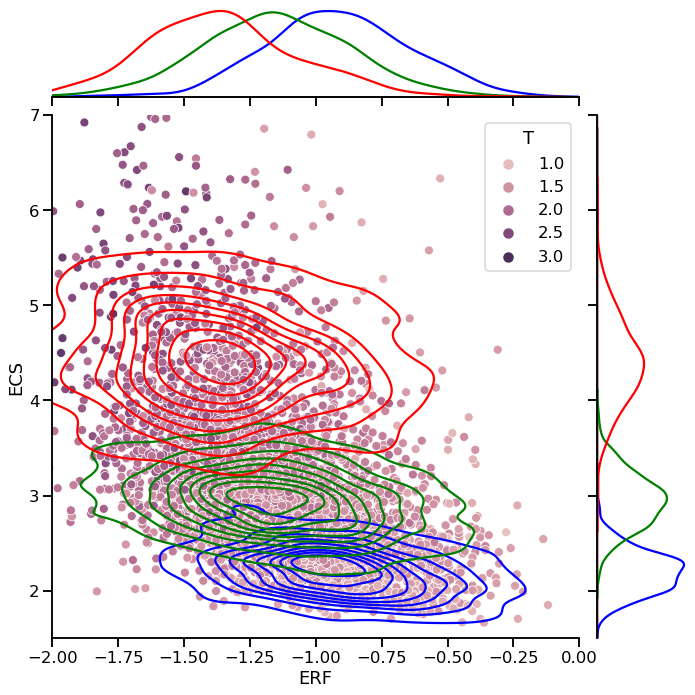

In [16]:
with sns.plotting_context("talk"):

    g = sns.jointplot(data=joint_df, x='ERF', y='ECS', kind='scatter', xlim=[-2, 0], ylim=[1.5, 7], height=10, hue='T')

    sns.kdeplot(data=joint_df[ecs_constraints.low_ECS.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['weak'])
    sns.kdeplot(data=joint_df[ecs_constraints.low_ECS.values], x='ERF', ax=g.ax_marg_x, color=colors['weak'])
    sns.kdeplot(data=joint_df[ecs_constraints.low_ECS.values], y='ECS', ax=g.ax_marg_y, color=colors['weak'])

    sns.kdeplot(data=joint_df[ecs_constraints.mid_ECS.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['mid'])
    sns.kdeplot(data=joint_df[ecs_constraints.mid_ECS.values], x='ERF', ax=g.ax_marg_x, color=colors['mid'])
    sns.kdeplot(data=joint_df[ecs_constraints.mid_ECS.values], y='ECS', ax=g.ax_marg_y, color=colors['mid'])

    sns.kdeplot(data=joint_df[ecs_constraints.high_ECS.values], x='ERF', y='ECS', ax=g.ax_joint, color=colors['strong'])
    sns.kdeplot(data=joint_df[ecs_constraints.high_ECS.values], x='ERF', ax=g.ax_marg_x, color=colors['strong'])
    sns.kdeplot(data=joint_df[ecs_constraints.high_ECS.values], y='ECS', ax=g.ax_marg_y, color=colors['strong'])
